# VaR analysis

In [13]:
import pandas as pd
import numpy as np
import OurModule as op
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%matplotlib inline

In [15]:
hfi= op.get_hfi_returns()

PeriodIndex(['1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06',
             '1997-07', '1997-08', '1997-09', '1997-10',
             ...
             '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11'],
            dtype='period[M]', name='date', length=263, freq='M')


## (a) Semi-deviation

#### Filter the negetive returns & then compute the standard deivation of that.

In [21]:
#Call the function for the above computation from the module (Alernative)
op.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## (b) Var & CVar Analysis
### Value at risk (VaR) is a statistic that measures and quantifies the level of financial risk within a firm, portfolio or position over a specific period.

### If the VaR for Convertible Arbitrage is -0.01576%, it implies that there is 5% probability that monthly return for Covertible Arbitrage -0.01576%.

### There are three approaches for calculating Value at risk(VaR) :
* Historic VaR
* Parametric VaR - Gaussian 
* Modified Cornish- Fisher VaR

In [22]:
import numpy as np

In [23]:
#Axis means that how many numbers do you want to run the percentile code on. If it is only the column, then you should put 0
np.percentile(hfi,5,axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [24]:
def var_historic(r,level= 5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or Dateframe")

In [25]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [11]:
op.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

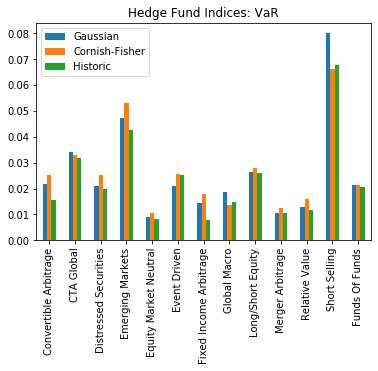

In [12]:
var_list = [op.var_gaussian(hfi),op.var_gaussian(hfi,modified=True),op.var_historic(hfi)]
comparsion = pd.concat(var_list,axis=1)
comparsion.columns = ["Gaussian","Cornish-Fisher","Historic"]
comparsion.plot.bar(title="Hedge Fund Indices: VaR")